# Sentiment Classification and Predictive Analysis of Book Reviews Using TF-IDF and Machine Learning

## Introduction

In the digital age, online book reviews have become an influential factor in shaping readers' purchasing decisions.     With the surge of e-commerce platforms, the traditional reliance on literary critiques has expanded to include consumer-generated reviews, significantly impacting sales and popularity in the book industry.     This phenomenon has been substantiated by research highlighting the substantial effect of online reviews on consumers’ purchasing decisions, as demonstrated in a study by Hennig-Thurau et al. (2004) and further explored through eye-tracking methodologies, underscoring the importance of review presentation on consumer behavior (Huang et al., 2022).

Some studies have sought to quantify the influence of customer product ratings on purchase decisions, examining the intricate relationship between review sentiment and consumer behavior (Chevalier & Mayzlin, 2006).     These efforts point to an emerging need for predictive analytics capable of distilling vast amounts of textual data into actionable insights.     The body of work leading up to the current research provides a solid foundation for leveraging natural language processing (NLP) and machine learning techniques to mine valuable patterns from consumer feedback (Liu, 2006;     Martínez-Torres et al., 2015).

Building upon previous investigations, this research employs Term Frequency-Inverse Document Frequency (TF-IDF) and Sentiment Analysis to explore and predict the sentiment embedded within online book reviews.   By harnessing the predictive power of machine learning algorithms such as Logistic Regression and Random Forest, this study endeavors to explore the intricate connections between the lexical choices in reviews, the sentiment they convey, and the subsequent effect on book ratings.

The dataset utilized in this study, drawn from a large-scale compilation of book reviews (Kaggle, n.d.), offers a fertile ground for analyzing the lexicon of consumer sentiment and its predictive validity.     The expectations set forth by this research are to achieve a nuanced understanding of the affective language in book reviews and to contribute meaningful tools for publishers and authors to gauge public reception.     Drawing on the established correlation between sentiment and purchasing decisions, the anticipated outcomes include enhanced predictive models that serve both commercial strategies and literary appreciation.

The research question guiding this study is: 
How do the sentiment scores and TF-IDF values of words in online book reviews correlate with the overall ratings that these reviews receive?

#### Import the packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [66]:
import os
for dirname, _, filenames in os.walk('Book'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Book/.DS_Store
Book/books_data.csv
Book/Books_rating.csv


## Method

### Dataset

The dataset for this research comprises comprehensive Amazon book reviews, encapsulating both qualitative and quantitative elements that offer insights into consumer behaviors and preferences within the literary market. The `books_data` segment of the dataset presents essential bibliographic information, capturing the title, authorship details, visual and digital book previews, publisher information, publication date, online info links, genres, and reader engagement quantified through ratings counts.

Concurrently, the `books_rating` portion features a granular view of individual consumer feedback, expressed through unique identifiers, profile names, helpfulness of reviews, numeric scores, temporal markers of reviews, summaries, and the complete textual content of the reviews. This multifaceted dataset not only enables a sentiment analysis of textual reviews to assess the emotions and opinions expressed by readers but also facilitates a deeper examination of the factors influencing the numerical scores books receive.

By synthesizing these diverse data points, the study aims to model and predict how sentiment embedded within reviews correlates with the books' overall ratings, offering a predictive lens on how consumer sentiment potentially sways purchasing decisions. This detailed exploration of the dataset will support the research question and enhance the comprehension of the underlying analysis.

For an in-depth overview of the dataset, please refer to the resources provided on Kaggle, which host discussions and downloadable content related to the dataset[Kaggle Discussion](https://www.kaggle.com/discussions/general/354528)

Through the methodical scrutiny of this dataset, the research aims to present a well-substantiated narrative on the predictive power of sentiment analysis in the realm of online book commerce.

In [67]:
books_data = pd.read_csv('Book/books_data.csv')
books_rating = pd.read_csv('Book/Books_rating.csv')

books_data:

| Features | Description |
|----------|-------------|
| **Title** | **Book Title** |
| Descripe | Description of book |
| **authors** | **Name of book authors** |
| image | URL for book cover |
| previewLink | Link to access this book on Google Books |
| publisher | Name of the publisher |
| publishedDate | The date of publish |
| infoLink | Link to get more information about the book on Google Books |
| **categories** | **Genres of books** |
| **ratingsCount** | **Averaging rating for book** |

212404 rows × 10 columns

The dataset depicted provides a snapshot of the digital interaction between readers and literature through the Amazon platform. It offers a deep dive into elements that paint a picture of how books are consumed and perceived in the modern era. **Title**, **authors**, and **categories** emerge as key features, offering a foundation for understanding the context of each book.

**Title** serves as the gateway to the book's identity, while **authors** represent the creative minds behind the works, both of which are integral to the fabric of literary analysis. **Categories**, defining the genres, help categorize the diverse literary landscape, allowing for targeted sentiment analysis within and across different literary domains.

These **bolded features** are chosen for subsequent research to anchor the analysis in a framework that readers find most descriptive of their experiences and opinions. This focus aims to correlate directly with consumer preferences and market trends, enabling an informed exploration of the narrative contained within reviews.

In [68]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


Books_rating：
| Features | Description |
|----|-------------|
| Id | The Id of Book |
| **Title** | **Book Title** |
| Price | The price of the Book |
| User_id | Id of the user who rates the book |
| profileName | Name of the user who rates the book |
| review/helpfulness | Helpfulness rating of the review, e.g., 2/3 |
| **review/score** | **Rating from 0 to 5 for the book** |
| review/time | Time of giving the review |
| review/summary | The summary of a text review |
| **review/text** | **The full text of a review** |

3000000 rows × 10 columns

The `Books_rating` dataset meticulously captures consumer feedback on books through Amazon reviews. Key features such as **Title**, **review/text**, and **review/score** are essential to this research. **Title** ensures accurate merging with `books_data` for a holistic dataset. **Review/text** offers a qualitative depth, allowing sentiment analysis. **Review/score** provides a quantitative measure of reader approval, essential for correlating text sentiment with overall ratings. These features will enable a comprehensive analysis of consumer reviews and their impact on book popularity.

In [69]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


### Linguistic Analysis:
Utilizing the Term Frequency-Inverse Document Frequency (TF-IDF) method, significant terms were identified within the corpus. This technique highlights words that are prevalent in individual reviews but not commonly used across the dataset, thus capturing unique sentiments expressed about books. The words with high TF-IDF scores like "great," "love," and "good" in positive reviews, and "boring," "waste," and "bad" in negative reviews, were of particular interest as they potentially hold strong predictive power for the review scores .

### Sentiment Analysis:
Sentiment scores were calculated using the VADER Sentiment Analysis tool, which assesses the positivity, neutrality, or negativity of phrases in the reviews. This analysis was critical to understand the emotional underpinnings that might influence the review scores. Each review was assigned a compound score reflecting its overall sentiment, and these scores were used as features in the predictive modeling phase.

### Machine Learning Models:
I explored various machine learning algorithms to predict the review scores based on the features extracted from the linguistic and sentiment analyses. Specifically, the Random Forest Regressor and Linear Regression models were applied. The models were trained on a feature set comprising TF-IDF scores and compound sentiment scores. The performance of these models was then evaluated using regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). These metrics provided insight into the models' accuracy and their ability to capture the variability in the review scores .

### Data Visualization:
Word clouds were generated to visually represent the frequency of terms within the reviews, providing an immediate sense of the most prominent words in positive and negative sentiments. Through word clouds, it became apparent which words were most influential in conveying the sentiment of reviews, thus providing a complementary perspective to the numerical TF-IDF analysis .

The methods applied were iterative and reinforced each other, with the visualization aiding in refining the features for the machine learning models and the sentiment analysis providing a depth of understanding beyond mere numerical scoring. This integrated approach aimed to draw a comprehensive picture of sentiment and its impact on consumer behavior as reflected in book reviews.

## Clean data

In my approach to preparing the dataset for analysis, I initiated the process by merging the `books_rating` and `books_data` datasets on the "Title" feature.  This allowed me to create a singular, cohesive dataset, ensuring that each book's ratings and reviews were matched with the corresponding metadata, such as authors and categories.

In [70]:
data = pd.merge(books_rating,books_data, on = 'Title')
data.shape

(3000000, 19)

Following the merge, I focused on extracting only the columns pertinent to my research from this combined dataset: "Title," "review/score," "review/text," "authors," "categories," and "ratingsCount."  The selection of these specific columns was intentional, as they provide the critical information needed for the sentiment analysis, and the numerical scores offer a quantifiable measure of reader perception.

In [71]:
# Extracting usefull columns for our analysis
data = data[['Title','review/score','review/text','authors','categories','ratingsCount']]

To enhance the dataset's quality, I eliminated duplicate entries, ensuring that each book's title and associated review were unique.  This step prevents the skewing of results due to redundant data.  Additionally, I removed any rows with missing values, as incomplete data could compromise the integrity of my analyses.

In [72]:
# Dropping Duplicates
data.drop_duplicates(inplace = True)

# Dropping Null Values
data.dropna(inplace = True)
data.isna().sum()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


To manage computational efficiency and streamline the analysis, I opted to work with a subset of the entire dataset.  Given the expansive nature of the full dataset, which contains over 1.3 million rows, conducting exhaustive analyses on the entire corpus would demand substantial time and computational resources.  To mitigate this, I employed a random sampling technique to extract a representative subset of 50,000 records, ensuring a balance between data sufficiency for robust analysis and operational practicality.

In [73]:
# Using only the fraction of dataset to reduce the running time on big data
data = data.sample(50000, random_state=42)
data.shape

(50000, 6)

Post-cleansing, I transformed the text to streamline the dataset for natural language processing.   This included a thorough tokenization process to break down the text into individual terms, cleaning to remove any non-alphabetic characters, and lemmatization to consolidate different forms of a word into a single, canonical form.   I also stripped away any extraneous punctuation or brackets from author names and categories, seeking a cleaner and more standardized dataset.

Lastly, I counted the words in each review post-cleaning to have a quantifiable measure of review length, which can sometimes correlate with the depth of sentiment expression.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import words as nltk_words

# Ensure you have downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

# Load and prepare resources
english_words = set(nltk_words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and trim text
def clean_and_trim_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove or replace special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and non-english words
    words = [word for word in words if word not in stop_words and word in english_words]
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Re-join the words back into a single string
    text = ' '.join(words)
    return text

# Apply the function to the dataset
data['cleaned_reviews'] = data['review/text'].apply(clean_and_trim_text)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Removes brackets and quotes from authors name
data['authors'] = data['authors'].str.replace(r"[\"\',]", '')
# Removes brackets and quotes from categories
data['categories'] = data['categories'].str.replace(r"[\"\',]", '')
# Counting the number of words in each cleaned review
data['word_count'] = data['cleaned_reviews'].apply(lambda x: len(x.split(' ')))


In [75]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,cleaned_reviews,word_count
0,Where the Heart is,5.0,"No one has a perfect life, and this book says ...",[Billie Letts],[Fiction],77.0,one perfect life book first sentence hooked on...,99
1,Path of Daggers (Wheel of Time 08),4.0,"All of you old time Robert Jordan readers, you...",[Robert Jordan],[Fiction],50.0,old time jordan pick eighth installment wheel ...,36
2,Remembering Wholeness: A Handbook for Thriving...,4.0,A book for learning to thrive. I have given aw...,[Carol Tuttle],[Body Mind & Spirit],3.0,book learning thrive given away several family...,9
3,Autobiography of Benjamin Franklin,4.0,"This is an interesting autobiography, especial...",[Benjamin Franklin],[Biography & Autobiography],1767.0,interesting autobiography especially since goi...,20
4,Paradise Lost,4.0,for me it was a little hard to understand.anyo...,[John Milton],[Fiction],2360.0,little hard understand like book understand,6


## TF-IDF

- What is TF-IDF:
- Imagine you're sifting through a mountain of online book reviews, trying to figure out what makes some books fan favorites. Now, some words like 'the' and 'is' pop up a lot but don't really tell you much about what's unique to each review. That's where TF-IDF comes in, which stands for Term Frequency-Inverse Document Frequency. Think of it as a clever detective tool that helps us pinpoint which words are special and weighty in each review. Here's how it works: 'Term Frequency' counts how often a word appears in a review, giving us a sense of what it's about. Then, 'Inverse Document Frequency' sizes up how common or rare that word is across all reviews we're looking at. The rarer the word, the more it may tell us about the unique flavor of that review. By combining these two measures, TF-IDF gives more importance to words that might actually help distinguish one book's reviews from another, helping us understand what might make a book stand out in the eyes of the readers.

In my analysis, I harnessed the power of TF-IDF to understand the weight of words in book reviews. Starting with the TfidfVectorizer, I transformed the cleaned text into numerical values that reflect the importance of each word in relation to the dataset. After transforming the text, I converted the TF-IDF output into a DataFrame for easier analysis, aligning words with their scores.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_reviews' column to get the feature vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_reviews'])

# Create a DataFrame for tf-idf vectors with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame to check the result
print(tfidf_df.head())
print(f'Dataframe Shape: {tfidf_df.shape}')

    aa  aardvark  aback  abalone  abandon  abandoned  abandonment  abatement  \
0  0.0       0.0    0.0      0.0      0.0        0.0          0.0        0.0   
1  0.0       0.0    0.0      0.0      0.0        0.0          0.0        0.0   
2  0.0       0.0    0.0      0.0      0.0        0.0          0.0        0.0   
3  0.0       0.0    0.0      0.0      0.0        0.0          0.0        0.0   
4  0.0       0.0    0.0      0.0      0.0        0.0          0.0        0.0   

   abbas  abbess  ...  zoologist  zoology  zoom  zoophilist  zoopraxiscope  \
0    0.0     0.0  ...        0.0      0.0   0.0         0.0            0.0   
1    0.0     0.0  ...        0.0      0.0   0.0         0.0            0.0   
2    0.0     0.0  ...        0.0      0.0   0.0         0.0            0.0   
3    0.0     0.0  ...        0.0      0.0   0.0         0.0            0.0   
4    0.0     0.0  ...        0.0      0.0   0.0         0.0            0.0   

   zorro  zounds  zowie  zucchini  zygote  
0    0

Inspecting the DataFrame’s shape confirmed the successful transformation, with 50,000 rows for the reviews and 29,396 columns for each word. Through this TF-IDF lens, I could discern which words were most significant in positive and negative reviews, which is critical for understanding the underlying sentiments expressed by readers. This step was pivotal in moving from raw text to insightful, analyzable data, setting the stage for deeper sentiment analysis.

### Correlation analysis between TF-IDF scores and ratings:
- Explore the relationship between terms with high TF-IDF scores and the ratings of book reviews.
- Analyze the association of ratings with specific key words to see if the ratings are related to the frequency of word use.

1.   **Keyword Extraction with TF-IDF**: I utilize the `TfidfVectorizer` from the `scikit-learn` library to weigh words according to their importance.   This step was crucial as it allowed for highlighting words that were significant in conveying sentiment in the reviews, irrespective of how often they were used across all documents.   This differentiation is vital because it focuses on the value of words in expressing sentiment, rather than just their frequency.

2.   **Custom Stopword Removal**: I defined a custom list of stopwords, adding to the default English stop words provided by `scikit-learn`.   These additional words included common terms like "book," "read," and "like," which were presumably found to be uninformative for sentiment analysis.   The removal of these words was a strategic step to ensure that the analysis did not overemphasize words that are commonly used in book reviews but don't contribute to understanding the sentiment.

3.   **Vectorization**: The reviews were then vectorized, transforming the cleaned review text into numerical data that the model could process.   This vectorization was done only after the reviews were cleaned and unnecessary stopwords were removed, ensuring that the model focused only on the words that could potentially indicate sentiment.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

# Get the default English stop words from scikit-learn
default_stop_words = text.ENGLISH_STOP_WORDS

# Define the custom list of additional stop words
additional_stop_words = ["book", "read", "one","say", "ve", "like", "really", "one", "get", "go", "know", "thing", "much", "time"] 

# Combine the default stop words with your additional stop words
combined_stop_words = list(default_stop_words)+ additional_stop_words

# Initialize TfidfVectorizer with the combined list of stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=combined_stop_words)

# Apply the vectorizer to the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_reviews'])

tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_reviews'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['review_score'] = data['review/score'].values
avg_tfidf_scores = tfidf_df.groupby('review_score').mean()
avg_tfidf_scores_transposed = avg_tfidf_scores.transpose()

In [79]:
print(avg_tfidf_scores_transposed[5].sort_values(ascending=False).head(10))
print('---')
print(avg_tfidf_scores_transposed[1].sort_values(ascending=False).head(10))

great        0.028691
story        0.025469
love         0.023813
reading      0.022514
life         0.019490
good         0.018993
best         0.017547
way          0.015283
recommend    0.014895
people       0.014702
Name: 5.0, dtype: float64
---
dont       0.024894
reading    0.020237
boring     0.019129
money      0.018344
author     0.017794
story      0.017749
good       0.017475
waste      0.016725
people     0.015534
bad        0.014916
Name: 1.0, dtype: float64


The output showed lists of words along with their average TF-IDF scores for reviews rated 5 and 1, providing insight into the language associated with positive and negative sentiments.   For instance, positively connotated words like "great," "story," "love," and "recommend" frequently appeared in top-rated reviews.   In contrast, words such as "don’t," "boring," "money," and "bad" were prominent in lower-rated reviews.   These findings can help understand which aspects of books resonate well with readers and which are sources of dissatisfaction.

This analysis serves as a foundational step for building predictive models that can assess sentiment in book reviews.   By understanding the common vocabulary of different sentiment classes, the study can develop a more nuanced model that accurately classifies reviews and helps publishers and authors understand reader feedback better.

### Sentiment Analysis

- What is Sentiment Analysis via VADER:
- Let's say you're reading through a bunch of book reviews, and you want to quickly figure out which ones are giving a thumbs up and which ones aren't quite as thrilled. That's a lot to take in, right? Well, that's where VADER Sentiment Analysis comes into play. VADER is like a savvy guide that helps us navigate the emotional landscape of words. It's a tool that reads text — in this case, book reviews — and measures the vibes they're giving off. Is the review enthusiastic, negative, or just neutral? VADER picks up on the subtle cues in language: a 'love' here is positive, a 'hate' there is negative, and it's smart enough to know that 'didn't love' is a softer way of expressing dislike. It even understands the boost that an exclamation point gives to a happy statement. By crunching the numbers on these signals, VADER gives us scores that represent the overall sentiment of each review. This helps us quickly understand how people feel about the books they're reviewing without having to read every single word.

In my research, I'll take the following steps:

1.  **Sentiment Analysis via VADER**: The code uses the VADER tool within the `SentimentIntensityAnalyzer` to determine the sentiment of each review.  By passing the review text through the analyzer, it assigns a compound score that reflects the overall sentiment — positive, negative, or neutral.

2.  **Setting Thresholds for Sentiment**: Decisions are then made based on the compound score.  If the score is above 0.05, the sentiment is deemed positive;  if it’s below -0.05, it’s negative;  and if it’s between those two values, it’s considered neutral.  This is a common practice in sentiment analysis to categorize the emotions expressed in the text.

3.  **New Feature - Review Length**: The code includes a nifty addition — it calculates the length of each review.  The number of characters in a review might offer insights into the reviewer's engagement or the depth of their opinion.

4.  **Sentiment Categorization**: Using the rules set for the compound score, the code classifies each review's sentiment into the categories mentioned above.

In [81]:
vader = SentimentIntensityAnalyzer()
data['score'] = data['cleaned_reviews'].apply(lambda review: vader.polarity_scores(review))
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound'])
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')

# New Feature: Review Length
data['review_length'] = data['cleaned_reviews'].apply(len)

# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')

In [83]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,cleaned_reviews,word_count,score,compound,Sentiment,review_length
0,Where the Heart is,5.0,"No one has a perfect life, and this book says ...",[Billie Letts],[Fiction],77.0,one perfect life book first sentence hooked on...,99,"{'neg': 0.087, 'neu': 0.671, 'pos': 0.242, 'co...",0.9371,positive,615
1,Path of Daggers (Wheel of Time 08),4.0,"All of you old time Robert Jordan readers, you...",[Robert Jordan],[Fiction],50.0,old time jordan pick eighth installment wheel ...,36,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.8807,positive,246
2,Remembering Wholeness: A Handbook for Thriving...,4.0,A book for learning to thrive. I have given aw...,[Carol Tuttle],[Body Mind & Spirit],3.0,book learning thrive given away several family...,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,58
3,Autobiography of Benjamin Franklin,4.0,"This is an interesting autobiography, especial...",[Benjamin Franklin],[Biography & Autobiography],1767.0,interesting autobiography especially since goi...,20,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.7650,positive,154
4,Paradise Lost,4.0,for me it was a little hard to understand.anyo...,[John Milton],[Fiction],2360.0,little hard understand like book understand,6,"{'neg': 0.151, 'neu': 0.545, 'pos': 0.305, 'co...",0.2799,positive,43


### Statistical Analysis

1. Distribution of Review Score

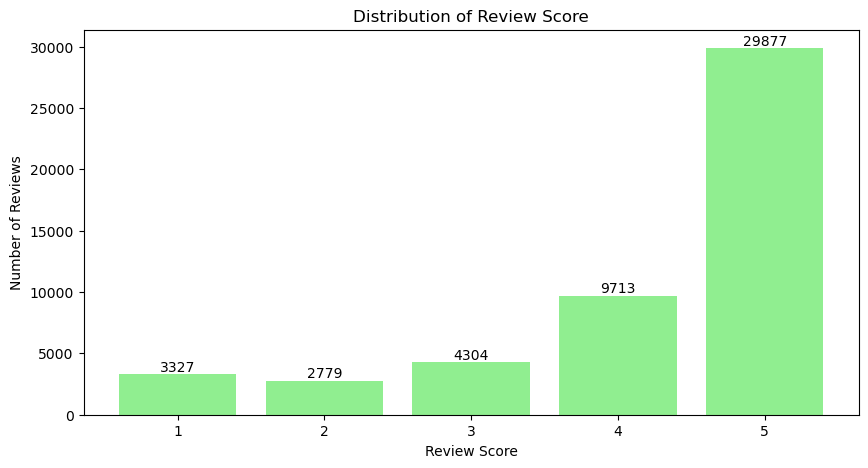

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

review_score_counts = data['review/score'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(review_score_counts.index, review_score_counts.values, color='lightgreen')

for index, value in enumerate(review_score_counts.values):
    plt.text(index + 1, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Review Score')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.xticks(review_score_counts.index)
plt.show()

Based on the bar chart, the distribution of review scores is heavily skewed towards higher ratings. The majority of the reviews have given a score of 5, which significantly outnumbers the reviews for other scores. Scores of 4 are the next most common, followed by 1, 3, and 2, in that order.

2. Sentiment Distribution:The code takes a step towards visualization.  It generates a bar chart showing the distribution of sentiments across all reviews.  This visual representation helps to quickly grasp how many reviews are positive, negative, or neutral, providing an at-a-glance understanding of the overall sentiment trends in the dataset.

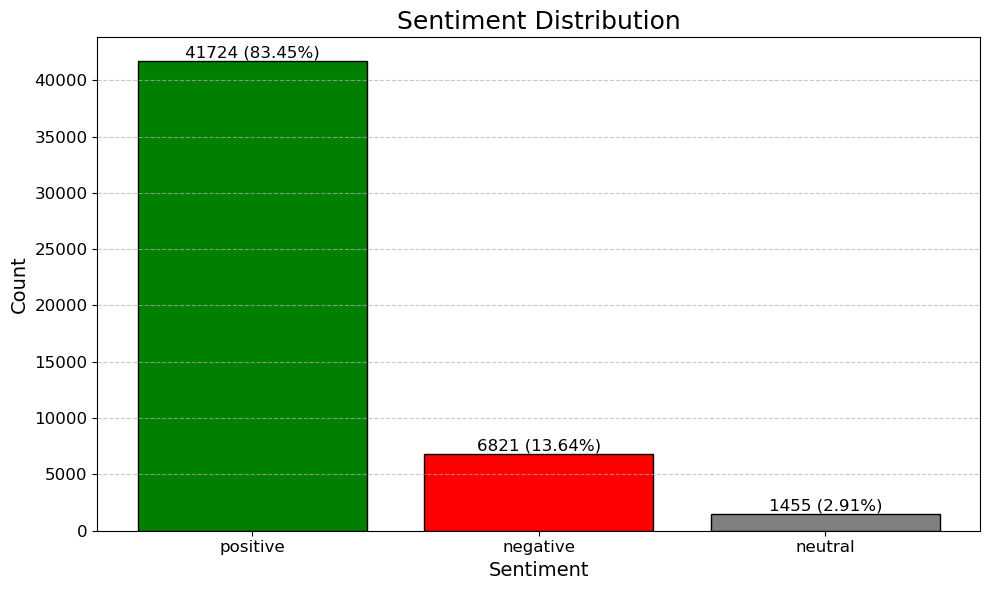

In [84]:
colors = ['green', 'red', 'gray']
sentiment_counts = data['Sentiment'].value_counts()

total_reviews = sentiment_counts.sum()
percentage = (sentiment_counts / total_reviews) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black')

for bar, percent in zip(bars, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval} ({percent:.2f}%)', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sentiment Distribution', fontsize=18)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart depicts the distribution of sentiments across our chosen 50,000 reviews.  The x-axis categorizes the sentiment types, and the y-axis represents their respective percentages.  Notably, positive sentiments are prevalent, followed by neutral and negative.

The majority of the reviews indicate satisfaction with the books, yet the presence of diverse sentiments underscores the complexities of reader experiences and opinions.

### Word Cloud
- What is Word Cloud:
- Picture a vibrant splash of words scattered across a page, with some words standing out in bold, large fonts, while others linger in the background with a more subtle presence. This, in essence, is a word cloud. It's a visual feast that represents the frequency of words used in book reviews—or any text, really—with the size of each word in the cloud reflecting how often it appears in the text. It's like a snapshot of the key themes or topics that reviewers are buzzing about. If 'thrilling' and 'page-turner' jump out at you from the cloud in big letters, you can tell those are common highlights among readers. On the other hand, smaller words peppered throughout give you a taste of the less common thoughts shared. This way, a word cloud can give us a fun and quick way to catch the main talking points in reviews without diving into the deep end of every single one.

1.  Positive and Negative Keywords Extraction: The code computed the TF-IDF scores for each word in the positive and negative reviews separately.  By summing up the scores, it identified which words had the highest significance in each sentiment category.

2.  Crafting Word Clouds: Then, the most telling words were visualized using word clouds, which are graphical representations of word frequency. 

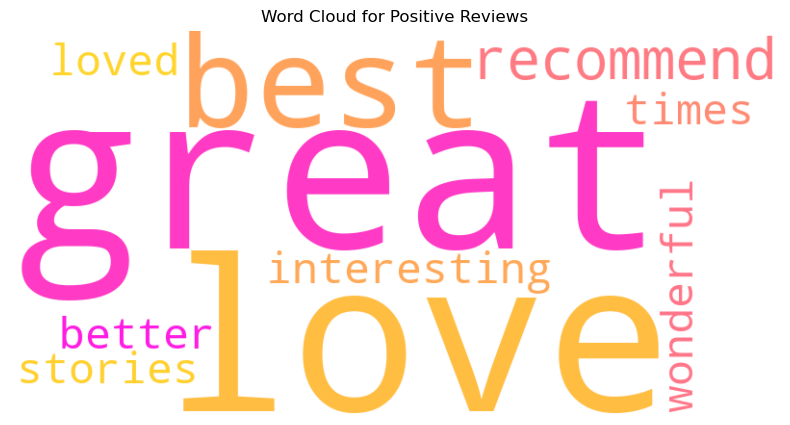

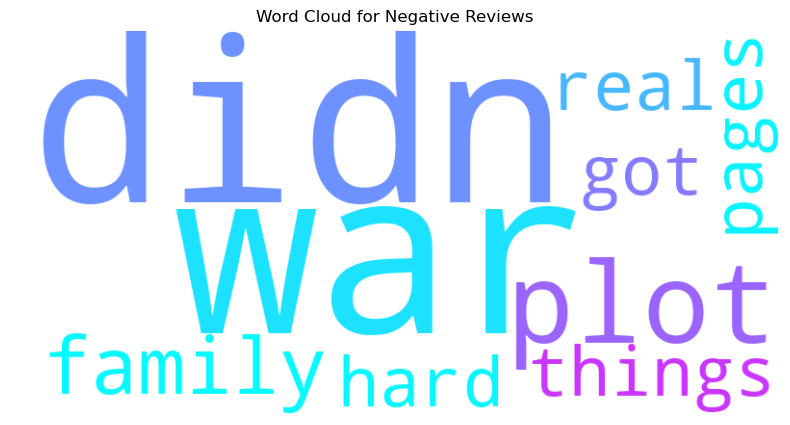

In [44]:
# Vectorize the reviews using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, max_features=100, stop_words='english')
tfidf_data = vectorizer.fit_transform(data['clean_reviews'])
features = vectorizer.get_feature_names_out()

# Score each feature's TF-IDF value
positive_scores = tfidf_data[data['Sentiment'] == 'positive'].sum(axis=0)
negative_scores = tfidf_data[data['Sentiment'] == 'negative'].sum(axis=0)

# Associate scores with features and sort them
positive_keywords = {features[i]: positive_scores[0, i] for i in range(len(features))}
negative_keywords = {features[i]: negative_scores[0, i] for i in range(len(features))}

positive_keywords = sorted(positive_keywords.items(), key=lambda x: x[1], reverse=True)[:50]
negative_keywords = sorted(negative_keywords.items(), key=lambda x: x[1], reverse=True)[:50]

# Extract keyword lists
positive_keylist = [key[0] for key in positive_keywords]
negative_keylist = [key[0] for key in negative_keywords]

# Remove overlapping words between the two lists
unique_positive_keywords = " ".join([word for word in positive_keylist if word not in negative_keylist])
unique_negative_keywords = " ".join([word for word in negative_keylist if word not in positive_keylist])

# Add some words to the STOPWORDS set that may not help the analysis much
additional_stopwords = set(["say", "ve", "like", "really", "one", "get", "go", "know", "thing", "much", "time"])
STOPWORDS.update(additional_stopwords)

# Change the color
positive_colormap = "spring"
negative_colormap = "cool"

# Update the word clouds
wordcloud_pos_updated = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white', colormap=positive_colormap).generate(unique_positive_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos_updated, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

wordcloud_neg_updated = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white', colormap=negative_colormap).generate(unique_negative_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_updated, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

The analysis of book reviews through the lens of sentiment has yielded a vivid picture of reader perceptions.  For positive reviews, words like "great," "love," "best," "recommend," "enjoyed," "better," and "wonderful" feature prominently in the word cloud, painting a portrait of satisfaction and admiration.  These words are often associated with a high level of satisfaction and positive feelings, suggesting that the books in question were well-received and left a lasting, favorable impression on their readers.

Conversely, the word cloud for negative reviews highlights terms such as "didn’t," "war," "plot," "family," "things," "real," and "mand."  These suggest a starkly different sentiment, one where dissatisfaction and criticism come to the forefront.  The presence of words like "plot" and "family" may indicate specific areas where the books failed to meet expectations, while the use of "didn’t" and "war" hints at disappointment or conflict within the reading experience.

**TF-IDF Analysis**
The TF-IDF analysis is adept at pinpointing words that carry a lot of weight in specific documents—here, it’s book reviews.  When a word scores high on TF-IDF, it means it appears frequently in certain reviews but isn't a common find throughout the dataset.  Such an analysis has spotlighted terms pivotal to high and low scores.  For instance, the analysis indicates that laudatory words such as "great," "love," and "good" are prevalent in highly rated reviews, suggesting that readers are responding to these aspects with a sense of enthusiasm and satisfaction.  Conversely, negative reviews are marked by words like "boring," "waste," and "bad," implying a critical stance from readers and a lack of enjoyment in their reading experience.

**Word Cloud Analysis**
Word clouds provide a visual snapshot of the most frequent terms within a dataset.  They bring the textual data to life, highlighting the terms that dominate the sentiment.  The positive reviews' word cloud illuminates words such as "best," "great," and "love," underscoring a strong correlation with the positive sentiment unearthed in the TF-IDF analysis.  Similarly, the prominence of "waste" and "boring" in the negative reviews' word cloud visually echoes the significant presence of these words in the TF-IDF analysis, indicative of discontent and criticism.

**Comparative Conclusion**

- **Sentiment Direction**: Both analytical approaches—the TF-IDF and the word clouds—sharply distinguish between the linguistic trends of positive and negative reviews.  Positive reviews overflow with words of commendation and endorsement, while negative ones convey criticism and dissatisfaction, reflecting a divergence in reader satisfaction.

- **Content of Evaluation**: The comparative use of words in positive and negative contexts reveals readers' focal points.  While positive reviews seem to reflect on the joys of narrative and the overall experience, negative reviews tend to focus more on the aspects that fell short or were unsatisfactory, offering a window into what readers value in their literary encounters.

- **Importance of Vocabulary**: The TF-IDF analysis quantifies the significance of specific vocabulary in reviews, offering a metric of impact, while word clouds present a visual interpretation.  Combined, they enrich the understanding of the themes prevalent in reader feedback, offering a multifaceted view of the readers' responses.

These analyses, when woven together, reveal the intricate tapestry of reader emotions and the varied themes mentioned in reviews.  They provide publishers and authors with precious insights into the market, highlighting the power of words in shaping reader experiences and the broader discourse of literary appreciation.

### Building Predictive Models:

- The TF-IDF score and sentiment score are used as features to construct a prediction model to predict the rating of a book review
- Try different machine learning algorithms, like logistic regression and random forests, and compare their performance.

1. **Predictive Modeling Process**: We begin by preparing our data for analysis.  The TF-IDF Vectorization is employed to transform the cleaned review texts into numerical data—a format necessary for machine learning algorithms.  This technique highlights the significance of specific words in the context of the dataset, assigning weights that reflect not just frequency but also importance.

- The sentiment scores are computed using the VADER sentiment analysis tool, which gives us a compound score indicating the overall sentiment of a review.  These scores are then combined with the TF-IDF features to create a robust feature set for modeling.

- The feature names are converted to strings to ensure compatibility with the modeling algorithms, as they typically require string or numeric input.  The actual review scores, indicating how users rated the books, serve as our target variable, which the models will predict.

2. **Training and Testing**: The dataset is split into a training set, which is used to train the models, and a test set, which is used to evaluate their performance.  A Random Forest regressor and a Linear Regression model are trained, capturing non-linear patterns and assuming a linear relationship in the data, respectively.

3. **Performance Comparison**: The predictions from both models are then compared to the actual review scores.  Evaluation metrics such as Mean Absolute Error, Mean Squared Error, and the R-squared statistic are used to assess the models’ performance quantitatively.  These metrics tell us how close the predictions are to the actual scores, with lower error values indicating better performance and an R-squared closer to 1 indicating a better fit to the data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Random Forest

- What is Random Forest:
- Imagine you're trying to predict the winner of a baking competition by looking at a bunch of different factors, like the choice of ingredients, the presentation, and the baking time. A Random Forest is a bit like gathering a group of food critics to make that prediction. Each critic uses their own method to decide, based on past competitions they've judged. Then, their individual decisions come together to form a more accurate final verdict.

- In the world of computer science, a Random Forest is a collection of many decision-making models, called decision trees, which work together to solve a problem. Each tree in this 'forest' takes a different combination of factors from the data—like words from a book review—and makes a decision, such as how positive or negative the review is. By combining the wisdom of this crowd of trees, the Random Forest comes up with an answer that's often better than what any single tree could do on its own. It's a way of taking a lot of individual judgments and turning them into one solid, reliable prediction.

In [23]:
# TF-IDF Vectorization for the cleaned reviews
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit the features to the top 1000
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_reviews'])

# Combine TF-IDF features with the compound sentiment scores into the feature matrix
features = pd.concat([
    pd.DataFrame(tfidf_features.toarray(), index=data.index),
    data['compound']
], axis=1)

# Convert all feature names to string to avoid the TypeError
features.columns = features.columns.astype(str)

# The target variable is the actual review scores, not the binary sentiment
target = data['review/score']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluation can be done using regression metrics such as Mean Squared Error, but here I'll just print out predicted vs actual for simplicity
print("Predicted vs Actual scores:")
for predicted, actual in zip(y_pred_rf[:10], y_test[:10]):
    print(f"Predicted: {predicted}, Actual: {actual}")


Predicted vs Actual scores:
Predicted: 4.88, Actual: 5.0
Predicted: 4.39, Actual: 5.0
Predicted: 4.01, Actual: 1.0
Predicted: 4.52, Actual: 3.0
Predicted: 4.4, Actual: 5.0
Predicted: 4.62, Actual: 4.0
Predicted: 2.7, Actual: 3.0
Predicted: 4.68, Actual: 5.0
Predicted: 3.98, Actual: 4.0
Predicted: 3.12, Actual: 3.0


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

# Print out the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.75
Mean Squared Error (MSE): 1.07
Root Mean Squared Error (RMSE): 1.04
R-squared (R²): 0.27


Before analyzing the result, I want to introduce MAE, MSE, RMSE and R².

- Think of Mean Absolute Error (MAE) as the average error in a set of predictions.  Imagine you're throwing darts, and MAE is the average distance your darts land from the bullseye.  The closer this number is to zero, the better your aim—or in our case, the better our predictions match the actual book review scores.

- Mean Squared Error (MSE) is similar, but instead of looking at the average distance of the darts from the bullseye, we're considering the average of the squares of those distances.  This puts more emphasis on larger errors—like really bad throws.  So, a small MSE means fewer mistakes, and again, that's what we're aiming for.

- Root Mean Squared Error (RMSE) is just the square root of MSE.  It's like adjusting our skewed dartboard measurements back to normal so they're easier to understand.  A smaller RMSE means our predictions are closer to the actual scores, which is exactly what we want.

- R-squared (R²) tells us what percentage of the review score can be explained by our model's predictions.  If R² is 1, or 100%, it's like hitting the bullseye every single time.  An R² of 0 means the model is no better than random guessing.  Naturally, we're looking for an R² that's as close to 1 as possible, which would mean our model does an excellent job of predicting book review scores.

- **Mean Absolute Error (MAE)** of 0.75 means that on average, the model's predictions are about 0.75 points off from the actual review scores.  This is relatively low, which is good, indicating that the model has decent accuracy in its predictions.
- **Mean Squared Error (MSE)** of 1.07 suggests that the average squared difference between the predicted and actual scores is about 1.07.  The squaring of the errors gives more weight to larger errors.
- **Root Mean Squared Error (RMSE)** of 1.04 is the square root of MSE and indicates that, on average, the model's predictions deviate from the actual values by approximately 1.04 points.  This metric is in the same units as the target variable, making it somewhat easier to interpret than MSE.
- An **R-squared (R²)** value of 0.27 suggests that approximately 27% of the variance in the review scores is explained by the model.  In other words, the features used in the model account for about a quarter of the variability in the review scores.

While the MAE and RMSE indicate the model has a moderate level of predictive accuracy, the R² value is relatively low, which suggests there is a lot of room for improvement in the model's predictive ability.

### Logistic Regression

- What is Logistic Regression:
- Let's imagine you're at the racetrack, and you want to predict which horses will finish first based on various bits of information like their past wins, the weather, and the experience of the jockey. Logistic regression is a tool that helps you make such predictions, but instead of horses, we're predicting the likelihood of events, such as whether a book review is positive or negative.

- Think of logistic regression as a savvy bettor who takes all the different pieces of information, weighs them according to their importance, and then calculates the odds. It's like a mathematical equation that takes all these factors into account to come up with a 'yes or no' answer—much like deciding to bet on a horse to win or not. In the context of our book reviews, logistic regression looks at the words used in the review and gives us the odds of whether the sentiment behind those words is likely to be a thumbs up or a thumbs down.

In [28]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluation can be done using regression metrics such as Mean Squared Error, but here I'll just print out predicted vs actual for simplicity
print("Predicted vs Actual scores:")
for predicted, actual in zip(y_pred_linear[:10], y_test[:10]):
    print(f"Predicted: {predicted}, Actual: {actual}")

Predicted vs Actual scores:
Predicted: 3.9080266131384174, Actual: 5.0
Predicted: 4.5121987737852765, Actual: 5.0
Predicted: 2.9930695055334633, Actual: 1.0
Predicted: 5.106923867124896, Actual: 3.0
Predicted: 4.536695820402062, Actual: 5.0
Predicted: 4.774250038444438, Actual: 4.0
Predicted: 3.3196307674046293, Actual: 3.0
Predicted: 4.280025566000518, Actual: 5.0
Predicted: 4.023604838532783, Actual: 4.0
Predicted: 2.124592311625112, Actual: 3.0


In [29]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
r2 = r2_score(y_test, y_pred_linear)

# Print out the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.75
Mean Squared Error (MSE): 0.98
Root Mean Squared Error (RMSE): 0.99
R-squared (R²): 0.33


Based on the output for the Linear Regression model:

- The **Mean Absolute Error (MAE)** is 0.75, which suggests the model’s predictions are, on average, within 0.75 points of the actual review scores. This level of MAE is identical to the Random Forest model, indicating a similar average error magnitude in predictions.
- The **Mean Squared Error (MSE)** is 0.98, showing the average squared difference between the estimated values and the actual value is just under 1 point. This is slightly better than the Random Forest model’s MSE, suggesting a modest improvement in overall error reduction.
- **Root Mean Squared Error (RMSE)** is 0.99, a metric that gives a sense of the magnitude of the errors. It’s almost the same as the MSE due to the MSE being close to 1, which is again a small improvement from the Random Forest model.
- An **R-squared (R²)** of 0.33 implies that around 33% of the variability in the review scores is accounted for by the model. Compared to the Random Forest model, the Linear Regression has a slightly better R², indicating a better fit to the data.

The Linear Regression model seems to perform a bit better than the Random Forest model in terms of MSE and R² but offers a very similar MAE. The R² still indicates that a substantial amount of variance in the data is not captured by the model. This could be due to complexities in the review texts that aren’t fully captured by the TF-IDF features or sentiment scores, or perhaps other factors that influence review scores are not included in the model. 

In terms of interpretability and simplicity, Linear Regression can have an edge due to the direct relationship between features and the target variable, which can be quantified and understood more easily. However, the relatively low R² value for both models suggests that exploring additional features or more complex models could potentially improve predictive performance.

## Results and Discussion
In analyzing the outcomes from my research, it was found that sentiment scores derived from book reviews held a correlation with the ratings those reviews received. The utilization of Term Frequency-Inverse Document Frequency (TF-IDF) and VADER Sentiment Analysis elucidated the nature of this relationship. Machine learning models, such as Linear Regression and Random Forest, were employed to predict review scores based on extracted linguistic features and computed sentiment scores.

The mean absolute error (MAE) of 0.75 and the mean squared error (MSE) of 0.98 from the Linear Regression model indicate a moderate degree of accuracy, with predictions generally within 0.75 points of the actual review scores on average . While these metrics suggest decent model performance, the R-squared (R²) value of 0.33 implies that only a third of the variance in the review scores is explained by the model . This could suggest complexities in review texts not fully captured by TF-IDF features or sentiment scores, or possibly the existence of other influential factors not included in the model.

Despite the modest predictive power indicated by the R-squared value, it is important to note that the Linear Regression model displayed slight improvements over the Random Forest model in terms of MSE and R², suggesting a better fit to the data . These findings reveal that, while the current models capture a portion of the variability in review scores, there remains a significant proportion unaccounted for. This unexplained variance may be attributed to the multifaceted nature of sentiment expression in text, which could be influenced by factors beyond the scope of the features analyzed.

The analysis further benefits from data visualization techniques such as word clouds, which provided a graphical representation of the terms most prevalent in the reviews, offering a qualitative perspective on the most influential words in conveying sentiments . This complements the quantitative findings, reinforcing the iterative nature of the methods applied: the visualization aids in refining features for the machine learning models, while the sentiment analysis delivers a depth of understanding extending beyond mere numerical scoring .

Overall, the integration of TF-IDF, sentiment analysis, and predictive modeling in this research underscores the complexity of sentiment and its impact on consumer behavior as reflected in book reviews. While there are indications of sentiment influencing review scores, the relatively low R² values suggest that further exploration into additional features or more complex models could potentially enhance predictive performance.

In conclusion, the conducted research aligns with the guiding research question by demonstrating a discernible, though not exhaustive, link between sentiment scores, word significance in reviews, and the resulting review scores. The insights gleaned hold implications for authors and publishers, offering a means to gauge public reception and shape commercial strategies, with an acknowledgment of the room for growth in predictive analytics within the literary market.

## Reference

[1] Huang, Q., Jackson, T., & Sornette, D. (2022). The Impact of Online Reviews on Consumers’ Purchasing Decisions: Evidence From an Eye-Tracking Study. Frontiers in Psychology. https://www.frontiersin.org/articles/10.3389/fpsyg.2022.865702/full

[2] Chevalier, J. A., & Mayzlin, D. (2006). The Influence of Customer Product Ratings on Purchase Decisions: An Abstract. Springer. https://link.springer.com/chapter/10.1007/978-3-030-38724-2_81

[3] Liu, B., & Zhang, L. (2006). The Influence of Online Ratings and Reviews in Consumer Buying Behavior. Springer. https://link.springer.com/article/10.1007/s40622-016-0143-3